# Titanic Data Analysis 

**Import libraries**

In [1]:
import os
import time

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import tensorflow as tf
import tensorflow.keras as keras

tf.__version__

'2.1.0'

**load csv dataset**

In [2]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

## Exploring Dataset

### Dataset Global Traits

**1. shape**
  
> Train Dataset has shape (891, 12)  

> Test &nbsp;Dataset has shape (418, 11) 

In [3]:
print('*** Shape of Train ***')
train.shape

*** Shape of Train ***


(891, 12)

In [4]:
print('*** Shape of Test ***') 
test.shape

*** Shape of Test ***


(418, 11)

**2. Missing Values**
  
> Train Dataset has Missing Values in Column [Age, Cabin, Embarked]  

> Test &nbsp;Dataset has Missing Values in Column [Age, Fare, Cabin] 

In [5]:
print('*** Missing Values in Train ***')
train.isna().sum()

*** Missing Values in Train ***


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
print('*** Missing Values in Test ***')
test.isna().sum()


*** Missing Values in Test ***


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**3. Show Dataset Sample**
  
> Train Dataset Column >>  
> [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticker, Fare, Cabin, Embarked]  
  
> Test Dataset Column >>  
> [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticker, Fare, Cabin, Embarked]

In [7]:
print('Train Dataset')
train.head()

Train Dataset


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
print('Test Dataset')
test.head()

Test Dataset


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Visualization

**1. Categorical Value by Bar Chart**

In [9]:
def bar_chart(dataset, features):
    survived = dataset[dataset['Survived'] == 1][features].value_counts()
    dead = dataset[dataset['Survived'] == 0][features].value_counts()
    df = pd.DataFrame([survived, dead], index=['Survived', 'Dead'])    
    df.plot(kind='bar', stacked=True, title='Survived/Dead based on {}'.format(features))
    plt.xticks(rotation=0)
    plt.show()
    return df

**1.1. Pclass**

> Pclass 1 is more likely to be survived  
> Pclass 3 is more likely to be dead

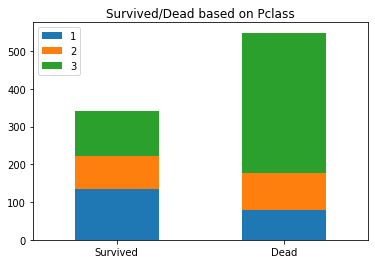

,1,2,3
Survived,136,87,119
Dead,80,97,372


In [10]:
bar_chart(train, 'Pclass')

**1.2. Sex**
> Female is more likely to be survived  
> Male &nbsp;&nbsp;&nbsp;&nbsp;is more likely to be dead

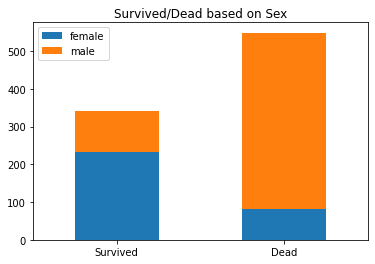

,female,male
Survived,233,109
Dead,81,468


In [11]:
bar_chart(train, 'Sex')

**1.3. Family Size (SibSp, Parch)**
> Most of the Passenger has 0 or 1 Family Size(SibSp or Parch)

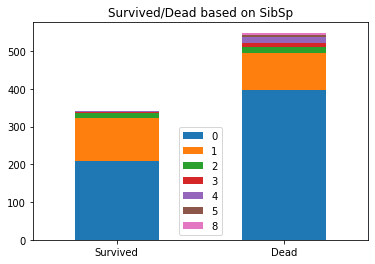

,0,1,2,3,4,5,8
Survived,210.0,112.0,13.0,4.0,3.0,NaN,NaN
Dead,398.0,97.0,15.0,12.0,15.0,5.0,7.0


In [12]:
bar_chart(train, 'SibSp')

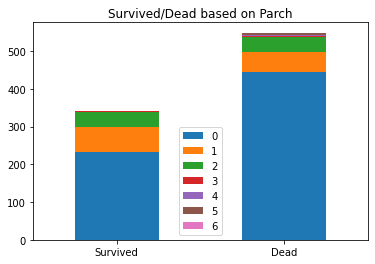

,0,1,2,3,4,5,6
Survived,233.0,65.0,40.0,3.0,NaN,1.0,NaN
Dead,445.0,53.0,40.0,2.0,4.0,4.0,1.0


In [13]:
bar_chart(train, 'Parch')

**1.4. Embarked**
> Most of the Passenger are from Embarked S

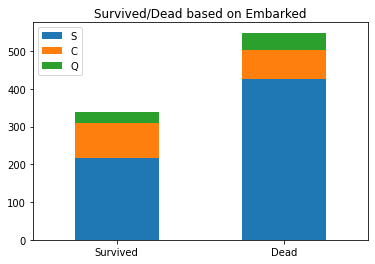

,S,C,Q
Survived,217,93,30
Dead,427,75,47


In [14]:
bar_chart(train, 'Embarked')

**2. Density Value by KDE Chart**

In [15]:
def kde_plot(dataset, features, bw=0.15):
    
    survived = dataset[dataset['Survived'] == 1][features].value_counts()
    dead = dataset[dataset['Survived'] == 0][features].value_counts()
    
    df = pd.DataFrame([survived, dead], index=['Survived', 'Dead'])
    
    facet = sns.FacetGrid(dataset, hue='Survived', aspect=4)
    facet.map(sns.kdeplot, features, shade=True, bw=bw)
    facet.set(xlim=(0, dataset[features].max()))
    plt.plot()
    
    return df


**2.1.Family Size(SibSp, Parch)**
> **SibSp Bins**  
> * 0&nbsp;&nbsp;&nbsp;: No  
> * 1&nbsp;&nbsp;&nbsp;: Only  
> * 2-4: Little  
> * 5-8: Many

> **Parch Bins**  
> * 0&nbsp;&nbsp;&nbsp;: No  
> * 1-3: Little  
> * 4-6: Many 

,0,1,2,3,4,5,8
Survived,210.0,112.0,13.0,4.0,3.0,NaN,NaN
Dead,398.0,97.0,15.0,12.0,15.0,5.0,7.0


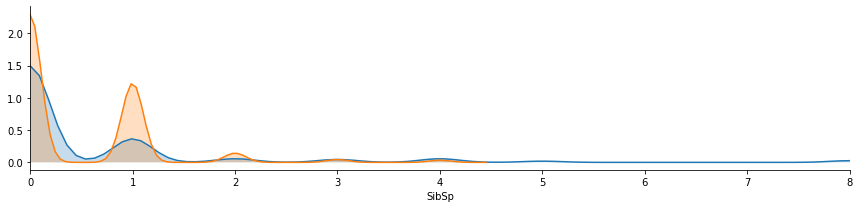

In [16]:
kde_plot(train, 'SibSp')

,0,1,2,3,4,5,6
Survived,233.0,65.0,40.0,3.0,NaN,1.0,NaN
Dead,445.0,53.0,40.0,2.0,4.0,4.0,1.0


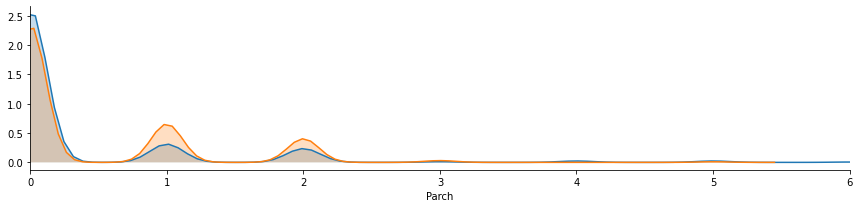

In [17]:
kde_plot(train, 'Parch')

**2.2.Age**
> **Age Bins**  
> * 01&nbsp;-9&nbsp;: Under-Teens  
> * 10-18: Teens  
> * 19-29: Twenties  
> * 30-38: Thirties  
> * 39-49: Fourties  
> * 50-59: Fifties    
> * 60-&nbsp;&nbsp;: Over-Fifties    

,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
Survived,1.0,1.0,2.0,2.0,1.0,5.0,3.0,5.0,7.0,4.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
Dead,NaN,NaN,NaN,NaN,NaN,2.0,7.0,1.0,3.0,NaN,...,2.0,NaN,2.0,3.0,1.0,2.0,1.0,2.0,1.0,NaN


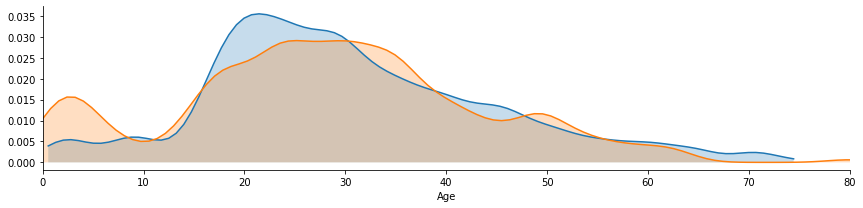

In [18]:
kde_plot(train, 'Age')

## Preprocessing (Feature Engineering)

### Add Column

**1. Name -> Title**

In [19]:
def add_title(dataset):
    dataset['Title'] = dataset['Name'].str.extract(r'([a-zA-Z]+)\. ', expand=True)
    return dataset

In [20]:
train = add_title(train)
test = add_title(test)

**2. Cabin -> CabinChr**

In [21]:
def add_cabin_chr(dataset):
    dataset['CabinChr'] = dataset['Cabin'].str.extract(r'([A-Z])', expand=True)
    return dataset

In [22]:
train = add_cabin_chr(train)
test = add_cabin_chr(test)

### Filling Missing Values

**1. Age by Median Value of Title** 

In [23]:
def get_age_dict(dataset):
    age_dict = dict()    
    age_default = dataset['Age'].median()
    
    for title in sorted(dataset['Title'].dropna().unique()):
        age = dataset[dataset['Title'] == title]['Age'].median()
        if pd.isna(age):
            age = age_default
        age_dict[title] = age

    return age_dict

In [24]:
def fill_age(dataset, age_dict):
    for title, age in age_dict.items():
        dataset.loc[dataset['Title'] == title, 'Age'] = dataset.loc[dataset['Title'] == title, 'Age'].fillna(age)
    
    dataset['Age'] = dataset['Age'].astype('int64', copy=False)
    return dataset

In [25]:
combined_dataset = pd.concat([train[['Title', 'Age']], test[['Title', 'Age']]], ignore_index=True)
age_dict = get_age_dict(combined_dataset)
train = fill_age(train, age_dict)
test = fill_age(test, age_dict)

**2. Fare by Average Value of Pclass** 

In [26]:
def get_fare_dict(dataset):
    fare_dict = dict()
    
    for pclass in sorted(dataset['Pclass'].dropna().unique()):
        fare = dataset[dataset['Pclass'] == pclass]['Fare'].mean()
        fare_dict[pclass] = fare
        
    return fare_dict

In [27]:
def fill_fare(dataset, fare_dict):
    for pclass, fare in fare_dict.items():
        dataset.loc[dataset['Pclass'] == pclass, 'Fare'] = dataset.loc[dataset['Pclass'] == pclass, 'Fare'].fillna(fare)
        
    return dataset    

In [28]:
combined_dataset = pd.concat([train[['Pclass', 'Fare']], test[['Pclass', 'Fare']]], ignore_index=True)
fare_dict = get_fare_dict(combined_dataset)
train = fill_fare(train, fare_dict)
test = fill_fare(test, fare_dict)

**3. CabinChr by Most Frequent Value of Pclass** 

In [29]:
def get_cabin_chr_dict(dataset):
    cabin_chr_dict = dict()
    
    for pclass in sorted(dataset['Pclass'].dropna().unique()):
        cabin_chr = dataset[dataset['Pclass'] == pclass]['CabinChr'].value_counts().index[0]
        cabin_chr_dict[pclass] = cabin_chr
        
    return cabin_chr_dict

In [30]:
def fill_cabin_chr(dataset, cabin_chr_dict):
    for pclass, cabin_chr in cabin_chr_dict.items():
        dataset.loc[dataset['Pclass'] == pclass, 'CabinChr'] = dataset.loc[dataset['Pclass'] == pclass, 'CabinChr'].fillna(cabin_chr)
        
    return dataset    

In [31]:
combined_dataset = pd.concat([train[['Pclass', 'CabinChr']], test[['Pclass', 'CabinChr']]], ignore_index=True)
cabin_chr_dict = get_cabin_chr_dict(combined_dataset)
train = fill_cabin_chr(train, cabin_chr_dict)
test = fill_cabin_chr(test, cabin_chr_dict)

**4. Embarked by Most Frequent Value of Embarked** 

In [32]:
def get_embarked_value(dataset):
    return dataset['Embarked'].value_counts().index[0]

In [33]:
def fill_embarked(dataset, embarked_value):
    dataset['Embarked'] = dataset['Embarked'].fillna(embarked_value)
    
    return dataset

In [34]:
combined_dataset = pd.concat([train[['Embarked']], test[['Embarked']]], ignore_index=True)
embarked_value = get_embarked_value(combined_dataset)
train = fill_embarked(train, embarked_value)
test = fill_embarked(test, embarked_value)

### Binning

**1. SibSp** 

In [35]:
def bin_sibsp(dataset):
    sibsp_dict = dict()
    for num in sorted(dataset['SibSp'].unique()):
        if num == 0:
            sibsp_dict[num] = 'No'
        elif num == 1:
            sibsp_dict[num] = 'One'
        elif 2 <= num <= 4:
            sibsp_dict[num] = 'Little'
        else:
            sibsp_dict[num] = 'Many'
            
    dataset['SibSp'] = dataset['SibSp'].replace(sibsp_dict)
    return dataset

In [36]:
train = bin_sibsp(train)
test = bin_sibsp(test)


**2. Parch** 

In [37]:
def bin_parch(dataset):
    parch_dict = dict()
    for num in sorted(dataset['Parch'].unique()):
        if num == 0:
            parch_dict[num] = 'No'
        elif 1 <= num <= 3:
            parch_dict[num] = 'Little'
        else:
            parch_dict[num] = 'Many'
            
    dataset['Parch'] = dataset['Parch'].replace(parch_dict)
    return dataset

In [38]:
train = bin_parch(train)
test = bin_parch(test)


**3. Age** 

In [39]:
def bin_age(dataset):
    age_dict = dict()
    for age in sorted(dataset['Age'].unique()):
        if age <= 9:
            age_dict[age] = 'Under-Teens'
        elif 10 <= age <= 18:
            age_dict[age] = 'Teens'
        elif 19 <= age <= 29:
            age_dict[age] = 'Twenties'
        elif 30 <= age <= 38:
            age_dict[age] = 'Thirties'
        elif 39 <= age <= 49:
            age_dict[age] = 'Fourties'
        elif 50 <= age <= 59:
            age_dict[age] = 'Fifties'
        else:
            age_dict[age] = 'Over-Fifties'
            
    dataset['Age'] = dataset['Age'].replace(age_dict)
    return dataset

In [40]:
train = bin_age(train)
test = bin_age(test)

**4. Title** 

In [41]:
def bin_title(dataset):
    title_dict = dict()
    for title in sorted(dataset['Title'].unique()):
        if title in ['Mr', 'Miss', 'Mrs']:
            title_dict[title] = title
        else:
            title_dict[title] = 'Other'
            
    dataset['Title'] = dataset['Title'].replace(title_dict)
    return dataset

In [42]:
train = bin_title(train)
test = bin_title(test)

### Normalization

**1. Fare** 
> Min Max Normalization (0 ~ 1)

In [43]:
def normalize_fare(dataset, min_fare, max_fare):
    dataset['Fare'] = (dataset['Fare'] - min_fare) / (max_fare - min_fare)
    return dataset

In [44]:
combined_dataset = pd.concat([train[['Fare']], test[['Fare']]], ignore_index=True)

min_fare = combined_dataset['Fare'].min()
max_fare = combined_dataset['Fare'].max()

train = normalize_fare(train, min_fare, max_fare)
test = normalize_fare(test, min_fare, max_fare)

### One Hot Encoding

In [45]:
def one_hot_encoding(dataset, columns, prefix):
    dataset = pd.get_dummies(dataset, columns=columns, prefix=prefix)
    return dataset

In [46]:
train = one_hot_encoding(train, 
                         ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Title', 'CabinChr'], 
                         ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Title', 'Cabin'])
test = one_hot_encoding(test, 
                        ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Title', 'CabinChr'], 
                        ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Title', 'Cabin'])

### Drop Column

In [47]:
def drop_columns(dataset, columns):
    dataset = dataset.drop(columns, axis=1)
    return dataset

In [48]:
train = drop_columns(train, ['Name', 'Ticket', 'Cabin'])
test = drop_columns(test, ['Name', 'Ticket', 'Cabin'])

### Final Checking

In [49]:
print('Processed Train Dataset')
train

Processed Train Dataset


,PassengerId,Survived,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_Fifties,Age_Fourties,...,Title_Mrs,Title_Other,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,1,0,0.014151,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,1,0.139136,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,3,1,0.015469,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,1,0.103644,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,5,0,0.015713,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,0.025374,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
887,888,1,0.058556,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
888,889,0,0.045771,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
889,890,1,0.058556,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [50]:
print('Processed Test Dataset')
test

Processed Test Dataset


,PassengerId,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_Fifties,Age_Fourties,Age_Over-Fifties,...,Title_Mr,Title_Mrs,Title_Other,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G
0,892,0.015282,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,893,0.013663,0,0,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,894,0.018909,0,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
3,895,0.016908,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,896,0.023984,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0.015713,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
414,1306,0.212559,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
415,1307,0.014151,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
416,1308,0.015713,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [51]:
test['Cabin_T'] = 0

In [52]:
print('Processed Test Dataset')
test

Processed Test Dataset


,PassengerId,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_Fifties,Age_Fourties,Age_Over-Fifties,...,Title_Mrs,Title_Other,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
0,892,0.015282,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,893,0.013663,0,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,894,0.018909,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,895,0.016908,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,896,0.023984,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0.015713,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
414,1306,0.212559,1,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
415,1307,0.014151,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
416,1308,0.015713,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Save Data

In [53]:
train.to_csv('./data/train_processed.csv', index=False, encoding='utf-8')
test.to_csv('./data/test_processed.csv', index=False, encoding='utf-8')

## Modeling

### Load Processed Data

In [2]:
def load_titanic():
    train = pd.read_csv('./data/train_processed.csv')
    test = pd.read_csv('./data/test_processed.csv')
        
    id_train = train['PassengerId']
    x_train = np.array(train.loc[:, 'Fare': 'Cabin_T'])
    y_train = np.array(train[['Survived']])
    
    id_test = test['PassengerId']
    x_test = np.array(test.loc[:, 'Fare': 'Cabin_T'])
    
    return (id_train, x_train, y_train), (id_test, x_test)

In [3]:
(id_train, x_train, y_train), (id_test, x_test) = load_titanic()

In [4]:
print('*** Shape of Train X ***')
print(x_train.shape)

*** Shape of Train X ***
(891, 35)


In [5]:
print('*** Shape of Train Y ***')
print(y_train.shape)


*** Shape of Train Y ***
(891, 1)


In [6]:
print('*** Shape of Test X ***')
print(x_test.shape)

*** Shape of Test X ***
(418, 35)


### Make Model using Keras Subclass

In [7]:
class TitanicModel(keras.Model):
    def __init__(self):
        super(TitanicModel, self).__init__()
        self.dense1 = keras.layers.Dense(units=32, kernel_initializer='glorot_normal', activation='relu')
        self.dense2 = keras.layers.Dense(units=1, kernel_initializer='glorot_normal', activation='sigmoid')
        
    def call(self, x):
        layer = self.dense1(x)
        y = self.dense2(layer)
        return y

In [8]:
model = TitanicModel()

In [9]:
temp_inputs = keras.Input(shape=x_train.shape)
model(temp_inputs)
model.summary()

Model: "titanic_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 891, 32)           1152      
_________________________________________________________________
dense_1 (Dense)              (None, 891, 1)            33        
Total params: 1,185
Trainable params: 1,185
Non-trainable params: 0
_________________________________________________________________


### Permormance Function

**1. Loss Function**

In [10]:
def loss_fn(model, x, y):
    logits = model(x)
    y = tf.cast(y, tf.float32)
    loss = -tf.reduce_mean(y * tf.math.log(logits) + (1 - y) * tf.math.log(1 - logits))
    return loss

**2. Accuracy Function**

In [11]:
def accuracy_fn(model, x, y):
    logits = model(x)
    prediction = tf.cast(logits > 0.5, tf.int64)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y), tf.float32))
    return accuracy

### Hyper Parameter

In [12]:
learning_rate = 0.001
batch_size = 128
epochs = 500
iterations = len(x_train) // batch_size

### Data Pipelining

In [13]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset = dataset.shuffle(1000)
dataset = dataset.prefetch(1000)
dataset = dataset.batch(batch_size)
dataset = dataset.repeat()

dataset_iterator = iter(dataset)

### Optimizer

In [14]:
lr_decay = keras.optimizers.schedules.ExponentialDecay(learning_rate, 100, 0.8, staircase=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_decay)

### Summary Writer and Checkpoint Directory

In [15]:
def load_checkpoint(model, checkpoint_dir):
    print('[*] find checkpoint at {}'.format(checkpoint_dir))
    
    ckpt = tf.train.get_checkpoint_state(checkpoint_dir)
    
    if ckpt:
        lates_checkpoint_name = os.path.basename(ckpt.model_checkpoint_path)
        checkpoint = tf.train.Checkpoint(dnn=model)
        checkpoint.restore(os.path.join(checkpoint_dir, lates_checkpoint_name))
        
        counter = int(lates_checkpoint_name.split('-')[1])
        print('[*] restore checkpoint {}'.format(lates_checkpoint_name))
        return True, counter
    else:
        print('[*] checkpoints not made')
        return False, 0        

In [16]:
current_dir = os.getcwd()
checkpoint_dir = 'checkpoints'
log_dir = 'logs'
model_dir = 'titanic_model'

checkpoint_dir = os.path.join(current_dir, checkpoint_dir, model_dir)
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_prefix = os.path.join(checkpoint_dir, model_dir)

log_dir = os.path.join(current_dir, log_dir, model_dir)

In [17]:
checkpoint = tf.train.Checkpoint(dnn=model)

could_load, checkpoint_counter = load_checkpoint(model, checkpoint_dir)
if could_load:
    start_epoch = checkpoint_counter    
else:
    start_epoch = 0

[*] find checkpoint at /Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/Titanic: Machine Learning from Disaster /checkpoints/titanic_model
[*] restore checkpoint titanic_model-401-5


In [18]:
summary_writer = tf.summary.create_file_writer(log_dir)

### Training

In [19]:
with summary_writer.as_default():
    start_time = time.time()

    for epoch in range(start_epoch, epochs):
        epoch_train_loss = 0.
        epoch_train_acc = 0.
        epoch_val_loss = 0.
        epoch_val_acc = 0.

        for iteration in range(iterations):
            x_train, y_train = dataset_iterator.get_next()

            with tf.GradientTape() as tape:
                loss = loss_fn(model, x_train, y_train)
            grads = tape.gradient(loss, model.variables)

            epoch_train_loss += loss
            epoch_train_acc += accuracy_fn(model, x_train, y_train)

            optimizer.apply_gradients(zip(grads, model.variables))

        epoch_train_loss /= (iterations)
        epoch_train_acc /= (iterations)

        x_val, y_val = dataset_iterator.get_next()
        epoch_val_loss = loss_fn(model, x_val, y_val)
        epoch_val_acc = accuracy_fn(model, x_val, y_val)
    
        tf.summary.scalar("train_loss", epoch_train_loss, step=epoch)
        tf.summary.scalar("train_acc", epoch_train_acc, step=epoch)
        tf.summary.scalar("val_loss", epoch_val_loss, step=epoch)
        tf.summary.scalar("val_acc", epoch_val_acc, step=epoch)

        if epoch % 10 == 0:
            print('{:8.4f} Epoch {:3d} TRAINING loss={:7.4f} acc={:.2%},  VALIDATION loss={:7.4f} acc={:.2%}'.format(time.time() - start_time, epoch + 1, epoch_train_loss, epoch_train_acc, epoch_val_loss, epoch_val_acc))
            
        if epoch % 100 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix + '-{}'.format(epoch + 1))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

  0.0651 Epoch   1 TRAINING loss= 0.7836 acc=36.33%,  VALIDATION loss= 0.7678 acc=38.21%
  0.3867 Epoch  11 TRAINING loss= 0.5169 acc=77.73%,  VALIDATION loss= 0.5547 acc=75.61%
  0.6983 Epoch  21 TRAINING loss= 0.4456 acc=81.38%,  VALIDATION loss= 0.4337 acc=81.30%
  0.9944 Epoch  31 TRAINING loss= 0.4344 acc=82.03%,  VALIDATION loss= 0.3514 acc=84.55%
  1.3350 Epoch  41 TRAINING loss= 0.4079 acc=83.33%,  VALIDATION loss= 0.4373 acc=80.49%
  1.6589 Epoch  51 TRAINING loss= 0.4091 acc=83.33%,  VALIDATIO

### Testing

In [19]:
(id_train, x_train, y_train), (id_test, x_test) = load_titanic()

In [20]:
def predict(model, x):
    pred = model.predict(x)
    pred = tf.cast(pred > 0.5, tf.int64)
    return pred

In [21]:
def accuracy_with_prediction(pred, real):
    return tf.reduce_mean(tf.cast(tf.equal(pred, real), tf.float32))

In [24]:
prediction = predict(model, x_train)
accuracy = accuracy_with_prediction(prediction, y_train)
print('Accuracy : {:.2%}'.format(accuracy))

Accuracy : 85.52%


### Make Submission

In [31]:
prediction = predict(model, x_test)
prediction = np.reshape(prediction.numpy(), (-1, ))
submission = pd.concat([id_test, pd.Series(prediction)], axis=1)
submission.columns = ['PassengerId', 'Survived']
submission.to_csv('./data/submission/submission.csv', index=False, encoding='utf-8')